In [13]:
import numpy as np
import pandas as pd
import sklearn

In [5]:
# read the contents of the file into a pandas dataframe
df = pd.read_csv('spam.csv', encoding='latin-1')

In [6]:
# show sample row and column in dataset
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2842,ham,"Tunji, how's the queen? how are you doing. Thi...",NaN,NaN,NaN
5455,ham,Wishing you a beautiful day. Each moment revea...,NaN,NaN,NaN
1207,ham,I need you to be in my strong arms...,NaN,NaN,NaN
4823,ham,Not thought bout it... || Drink in tap & spile...,NaN,NaN,NaN
5522,ham,Thats cool. I want to please you...,NaN,NaN,NaN


In [7]:
# number of rows and columns in the dataset
df.shape

(5572, 5)

### Todo

* Data Cleaning
* Exploratory data analysis
* Preprocessing
* Evaluation of model performance
* Improvement
* Deployment

In [8]:
# details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop irrelevant columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [10]:
df.sample(5)

,v1,v2
771,ham,Lol! U drunkard! Just doing my hair at d momen...
3856,ham,No! But we found a diff farm shop to buy some ...
81,ham,K. Did you call me just now ah?
1029,ham,"Its good, we'll find a way"
1261,ham,Thank you so much. When we skyped wit kz and s...


In [11]:
# rename the columns
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)

In [12]:
df.sample(5)

,target,text
3352,ham,I emailed yifeng my part oredi.. Can Ì_ get it...
4313,ham,Is ur changes 2 da report big? Cos i've alread...
3831,ham,Ok.
3251,ham,Come to medical college at 7pm ......forward i...
1161,ham,K. I will sent it again


In [16]:
# check for values in the target column
df.target.unique()

array(['ham', 'spam'], dtype=object)

### Preprocessing

In [15]:
# label encoder converts the target column (categorical data) into numeric values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
# check the target column now
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Handle missing values in the dataset

In [20]:
df.isnull().sum()

target    0
text      0
dtype: int64

>- There are no missing values in the dataset

In [22]:
# check for duplicates
df.duplicated().sum()

403

>- There are 403 duplicated values in the dataset

In [23]:
# drop duplicated values but keep the first occurence
df = df.drop_duplicates(keep='first')

In [24]:
# Now let's check duplicated values again
df.duplicated().sum()

0

### Exploratory Data Anaysis

In [25]:
# check the number of 0s and 1s in the target column
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

>- There are 4516 0s and 653 1s in the dataset

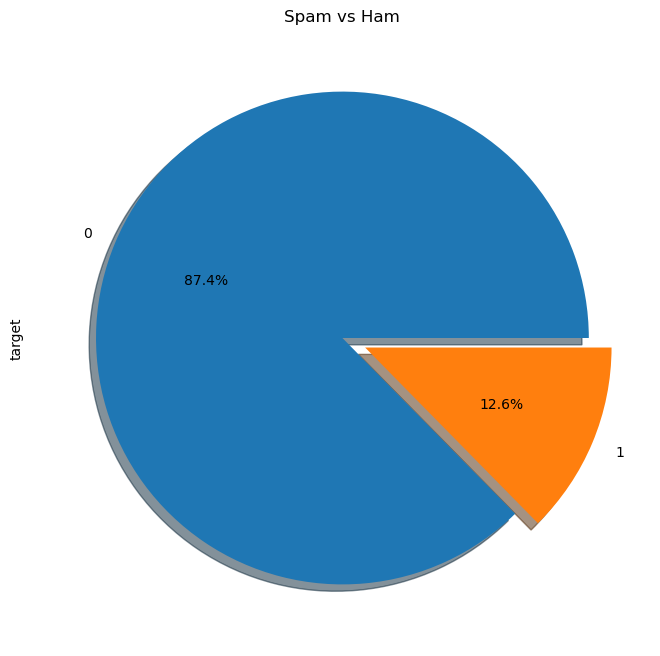

In [26]:
# plot the target column on a pie chart
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plot the target column on a pie chart
plt.figure(figsize=(8,8))
df.target.value_counts().plot.pie(autopct='%1.1f%%', explode=[0,0.1], shadow=True)
plt.title('Spam vs Ham')
plt.show()

>- We could see from the chat that, the target column is highly unbalanced

In [28]:
import nltk

In [29]:
!pip install nltk

In [30]:
# used for sentence segmentation
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/eben-
[nltk_data]     success/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
# add num_characters column to the dataframe
df['num_characters'] = df['text'].apply(len)

In [32]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
# Sentence segmentation: split the text into sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1
